<a href="https://colab.research.google.com/github/azad26195/fastAi-Exp/blob/master/FastAi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create  Data Set

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'black'
file = 'black_bear.txt'

In [0]:
folder = 'teddys'
file = 'teddy_bear.txt'

In [0]:
folder = 'grizzly'
file = 'brown_bear.txt'

In [0]:

path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [30]:
path.ls()

[PosixPath('data/bears/teddy_bear.txt'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/black_bear.txt'),
 PosixPath('data/bears/brown_bear.txt'),
 PosixPath('data/bears/black'),
 PosixPath('data/bears/teddys')]

In [0]:

classes = ['teddys','grizzly','black']

In [0]:
download_images(path/file, dest, max_pics=60, max_workers=0)


In [25]:

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000016.jpg'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000037.jpg'>
black


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data.classes

['black', 'grizzly', 'teddys']

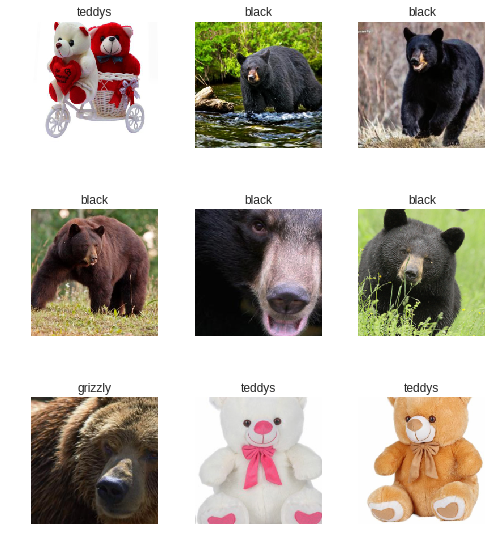

In [28]:
data.show_batch(rows=3, figsize=(7,8))

In [29]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['black', 'grizzly', 'teddys'], 3, 177, 44)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)


In [31]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate
1,1.226660,0.876327,0.477273
2,0.886838,0.222682,0.090909
3,0.622284,0.111299,0.045455
4,0.496069,0.081007,0.000000


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [36]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06


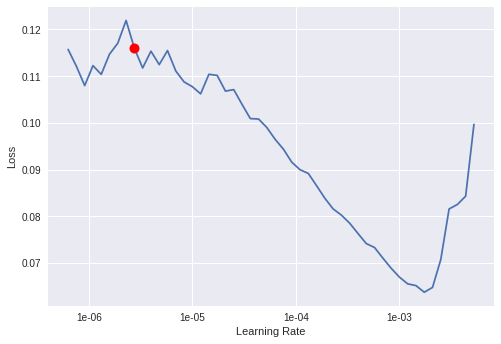

In [37]:
learn.recorder.plot()


In [38]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.106603,0.078431,0.000000
2,0.095600,0.087534,0.022727


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

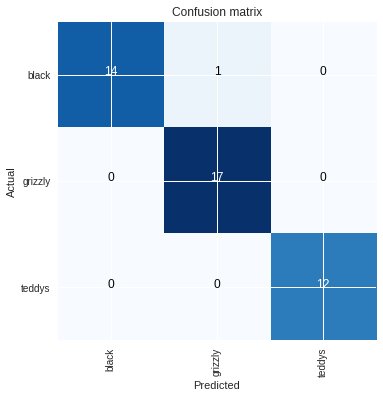

In [41]:
interp.plot_confusion_matrix()


In [42]:
from fastai.widgets import *

In [0]:
lossess, idxs = interp.top_losses()
top_lossess_path = data.valid_ds.x[idxs]


In [0]:
learn.export()



In [0]:
defaults.device = torch.device('cpu')


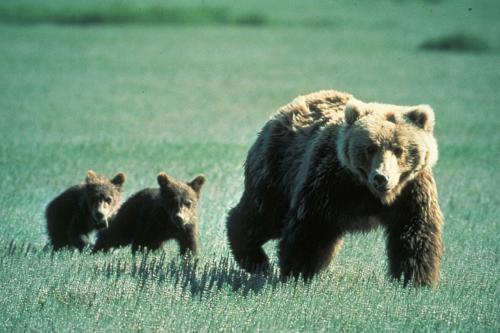

In [53]:
img = open_image(path/'grizzly/00000001.jpg')

img


In [0]:
learn = load_learner(path)


In [55]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class



Category grizzly